In [1394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
%load_ext pycodestyle_magic

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30,10)
import warnings
warnings.filterwarnings('ignore')

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [1395]:
def print_cols_nans(df):
    for col in df.columns:
        Nnan = df[col].isna().sum()
        print(col, " ; Count of NAN = ", Nnan, " ; Count of not NAN = ",df.shape[0]-Nnan)

def del_nan_cols(df):
    for col in df:
        if (df[col].isna().sum() > df.shape[0]*1.95/2):
            df = df.drop(col, axis = 1)
    return df

In [1396]:
CNS_oil = pd.read_csv('CNS oil.csv')
CNS_rock_samples = pd.read_csv('CNS rock samples.csv')
CNS_Field_Production = pd.read_csv('CNS_Field_Production.csv')
CNS_gas_test = pd.read_csv('CNS_gas_test.csv')
CNS_gas_train = pd.read_csv('CNS_gas_train2.csv')

explanation = pd.read_csv('CNS_gas_train.csv').iloc[0]

In [1397]:
CNS_gas_test['WH_FIELD'].unique()

array([nan, 'ACORN', 'CURLEW D', 'STARLING', 'BITTERN', 'PUFFIN',
       'PIERCE', 'SEAGULL', 'MARNOCK', 'Turnstone', 'GANNET D', 'HOWE',
       'GANNET A', '020/03-04 (Marten)', '015/18A-06Z', 'TARTAN',
       'GOLDENEYE'], dtype=object)

In [1398]:
CNS_gas_train['WH_FIELD'].unique()

array(['PIERCE', 'Judy', 'Joanne', '030/06-03A', nan, 'Janice', 'FULMAR',
       'BEECHNUT', 'PUFFIN', '029/08a-04', 'CURLEW C', 'CURLEW B',
       'CURLEW D', 'FRANKLIN', 'FRAM', 'STARLING', 'BITTERN', 'ARRAN',
       'NELSON', 'SHEARWATER', 'SCOTER', 'HERON', '022/30A-17 (Aragorn)',
       '022/29-02', 'SEAGULL', 'GANNET A', 'EGRET', 'SKUA', '22/24B-8',
       '22/24B-7', 'MARNOCK', 'Selkirk', '022/14B-03', 'BARDOLINO',
       'HOWE', 'FORTIES', 'GANNET C', 'GUILLEMOT A', 'GANNET E',
       'BELINDA', 'GANNET F', '021/30-17', 'EVELYN', 'GUILLEMOT W AND NW',
       'GUILLEMOT', 'GANNET B', 'TEAL', 'TEAL SOUTH', 'CLAPHAM',
       'GUILLEMOT NORTHWEST', 'GUILLEMOT WEST', 'Pict', 'BLIGH',
       '021/20B-04Y (Christian)', 'COOK', 'Glenn', 'Gadwall', 'MALLARD',
       'KITTIWAKE', 'Forties Satellite', 'GOOSANDER',
       '020/08-02 (Inner Pear)', 'GOLDENEYE', 'Ettrick', 'RUBIE',
       'Rochelle', 'Macculloch', 'Scott', 'Perth', '015/21B-47 (Perth)',
       'Ivanhoe', '015/18A-12 (Maria)'

In [1399]:
target_cols = ['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5'] 
CNS_gas_train['WH_FIELD'] = CNS_gas_train['WH_FIELD'].fillna(0)
CNS_gas_test['WH_FIELD'] = CNS_gas_test['WH_FIELD'].fillna(0)
CNS_gas_train['WH_FIELD'] = CNS_gas_train['WH_FIELD'].astype('category')
CNS_gas_test['WH_FIELD'] = CNS_gas_test['WH_FIELD'].astype('category')

In [1400]:
CNS_gas_test[target_cols] = CNS_gas_test[target_cols].fillna(0)
CNS_gas_test = del_nan_cols(CNS_gas_test)
CNS_gas_test = CNS_gas_test.select_dtypes(exclude=['object'])
#CNS_gas_test.dropna()
CNS_gas_test = CNS_gas_test.fillna(0)
CNS_gas_test.shape

(100, 40)

In [1401]:
CNS_gas_train['WH_FIELD'] = CNS_gas_train['WH_FIELD'].cat.codes
CNS_gas_test['WH_FIELD'] = CNS_gas_test['WH_FIELD'].cat.codes

In [1402]:
#CNS_gas_train['GAS_N2'] = CNS_gas_train['GAS_N2'].replace(np.nan, 0)
CNS_gas_train.head()

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,...,DD_G_H2,DN_G_N2,DD_G_GAS,DD_G_NC1,DD_G_NC2,DD_G_NC3,DD_G_IC4,DD_G_NC4,DD_G_IC5,DD_G_NC5
0,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,61,023/22a,NaN,NaN,NaN,SHELL,...,NaN,-4.0,NaN,-187.0,NaN,NaN,NaN,NaN,NaN,NaN
1,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,61,023/22a,NaN,NaN,NaN,SHELL,...,NaN,-3.7,NaN,-187.0,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,61,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,61,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,61,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1403]:
CNS_gas_train = CNS_gas_train[CNS_gas_test.columns]
CNS_gas_train = CNS_gas_train.dropna(subset=target_cols)
CNS_gas_train = del_nan_cols(CNS_gas_train)
#CNS_gas_train = CNS_gas_train.dropna()
#CNS_gas_train['GAS_N2'] = CNS_gas_train['GAS_N2'].fillna(0)
CNS_gas_train = CNS_gas_train.fillna(0)
CNS_gas_train = del_nan_cols(CNS_gas_train)
CNS_gas_train = CNS_gas_train.dropna()

In [1404]:
#CNS_gas_test = CNS_gas_test.select_dtypes(exclude=['object'])
#CNS_gas_train = del_nan_cols(CNS_gas_train)
#CNS_gas_train = CNS_gas_train.dropna()
#CNS_gas_train.shape

In [1405]:
CNS_gas_train.shape

(1709, 38)

In [1406]:
#CNS_gas_train = CNS_gas_train.fillna(0)
CNS_gas_train = CNS_gas_train.select_dtypes(exclude=['object'])
CNS_gas_train = del_nan_cols(CNS_gas_train)
CNS_gas_train.head()

,WH_FIELD,WH_LAT,WH_SPUD_YEAR,WH_TD_M,WH_DR_ELEV_M,WH_WATER_DEPTH_M,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,SAMPLE_ID_GDB,GAS_AIR,...,CSIA_NC2,CSIA_NC3,CSIA_IC4,CSIA_NC4,CSIA_IC5,CSIA_NC5,CSIA_ETHENE,CSIA_PROPENE,DC_G_CO2,DN_G_N2
0,61,0.0,0.0,0.0,0.0,0.0,9814.0,12360.0,0.0,0.069,...,-28.8,-28.2,-29.0,-28.5,-28.2,-28.7,0.0,0.0,-7.7,-4.0
1,61,0.0,0.0,0.0,0.0,0.0,9814.0,12360.0,0.0,0.021,...,-28.8,-28.2,-29.0,-28.5,-28.2,-28.7,0.0,0.0,-7.6,-3.7
2,61,0.0,0.0,0.0,0.0,0.0,5400.0,5400.0,0.0,0.000,...,-35.5,-26.1,-26.0,-27.0,-29.0,-29.0,0.0,0.0,0.0,0.0
3,61,0.0,0.0,0.0,0.0,0.0,6600.0,6600.0,0.0,0.000,...,-33.1,-28.3,-29.0,-29.0,-28.0,-29.0,0.0,0.0,0.0,0.0
4,61,0.0,0.0,0.0,0.0,0.0,7300.0,7300.0,0.0,0.000,...,-32.9,-29.2,-30.0,-28.0,-28.0,-28.0,0.0,0.0,0.0,0.0


In [1407]:
#CNS_gas_train = CNS_gas_train.fillna(0)

In [1408]:
CNS_gas_train = CNS_gas_train.select_dtypes(exclude=['object'])
CNS_gas_train = CNS_gas_train.fillna(0)
useless_cols = ['WH_LAT', 'WH_SPUD_YEAR','SAMPLE_ID_GDB', 'SH_DEPTH_TOP_FT','SH_DEPTH_BOT_FT','WH_TD_M'] ##,'WH_TD_M', 'WH_DR_ELEV_M', 'WH_WATER_DEPTH_M'
CNS_gas_train = CNS_gas_train.drop(useless_cols, axis=1)
explanation = explanation[CNS_gas_train.columns]
explanation

WH_FIELD                              Field name
WH_DR_ELEV_M         Derrick floor elevation (m)
WH_WATER_DEPTH_M                 Water depth (m)
GAS_AIR              Air in original sample Mol%
GAS_C1                     Methane air free Mol%
GAS_C2                      Ethane air free Mol%
C2_UNSAT            C2 unsaturated air free Mol%
GAS_C3                     Propane air free Mol%
C3_UNSAT            C3 unsaturated air free Mol%
GAS_IC4                 Iso butane air free Mol%
GAS_NC4              Normal butane air free Mol%
GAS_NEOC5                          Neo pentane %
GAS_IC5                Iso pentane air free Mol%
GAS_NC5             Normal pentane air free Mol%
GAS_C6PLUS            C6+ fraction air free Mol%
GAS_CO2                        CO2 air free Mol%
GAS_H2                    Hydrogen air free Mol%
GAS_H2S                        H2S air free Mol%
GAS_N2                    Nitrogen air free Mol%
CSIA_CONC_C1                             vol% C1
CSIA_NC1            

In [1409]:
CNS_gas_train.shape

(1709, 31)

In [1410]:
CNS_gas_train = CNS_gas_train.dropna(axis=0)
CNS_gas_train.head()

,WH_FIELD,WH_DR_ELEV_M,WH_WATER_DEPTH_M,GAS_AIR,GAS_C1,GAS_C2,C2_UNSAT,GAS_C3,C3_UNSAT,GAS_IC4,...,CSIA_NC2,CSIA_NC3,CSIA_IC4,CSIA_NC4,CSIA_IC5,CSIA_NC5,CSIA_ETHENE,CSIA_PROPENE,DC_G_CO2,DN_G_N2
0,61,0.0,0.0,0.069,75.5,11.40,0.0019,6.100,0.0008,1.0000,...,-28.8,-28.2,-29.0,-28.5,-28.2,-28.7,0.0,0.0,-7.7,-4.0
1,61,0.0,0.0,0.021,75.4,11.20,0.0017,6.100,0.0007,1.1000,...,-28.8,-28.2,-29.0,-28.5,-28.2,-28.7,0.0,0.0,-7.6,-3.7
2,61,0.0,0.0,0.000,99.8,0.14,0.0000,0.029,0.0000,0.0043,...,-35.5,-26.1,-26.0,-27.0,-29.0,-29.0,0.0,0.0,0.0,0.0
3,61,0.0,0.0,0.000,99.4,0.47,0.0010,0.086,0.0007,0.0097,...,-33.1,-28.3,-29.0,-29.0,-28.0,-29.0,0.0,0.0,0.0,0.0
4,61,0.0,0.0,0.000,99.4,0.50,0.0028,0.110,0.0014,0.0160,...,-32.9,-29.2,-30.0,-28.0,-28.0,-28.0,0.0,0.0,0.0,0.0


In [1411]:
CNS_gas_train.shape

(1709, 31)

In [1412]:
gas_target = CNS_gas_train[target_cols]
gas_train = CNS_gas_train.drop(target_cols, axis = 1)
gas_train = gas_train.fillna(0)

In [1413]:
print(gas_target.shape, gas_train.shape)

(1709, 7) (1709, 24)


In [1417]:
gas_train.head()

,WH_FIELD,WH_DR_ELEV_M,WH_WATER_DEPTH_M,GAS_AIR,C2_UNSAT,C3_UNSAT,GAS_NEOC5,GAS_C6PLUS,GAS_CO2,GAS_H2,...,CSIA_NC2,CSIA_NC3,CSIA_IC4,CSIA_NC4,CSIA_IC5,CSIA_NC5,CSIA_ETHENE,CSIA_PROPENE,DC_G_CO2,DN_G_N2
0,61,0.0,0.0,0.069,0.0019,0.0008,0.0085,0.50,1.800,0.0,...,-28.8,-28.2,-29.0,-28.5,-28.2,-28.7,0.0,0.0,-7.7,-4.0
1,61,0.0,0.0,0.021,0.0017,0.0007,0.0087,0.58,1.800,0.0,...,-28.8,-28.2,-29.0,-28.5,-28.2,-28.7,0.0,0.0,-7.6,-3.7
2,61,0.0,0.0,0.000,0.0000,0.0000,0.0000,0.00,0.037,0.0,...,-35.5,-26.1,-26.0,-27.0,-29.0,-29.0,0.0,0.0,0.0,0.0
3,61,0.0,0.0,0.000,0.0010,0.0007,0.0000,0.00,0.033,0.0,...,-33.1,-28.3,-29.0,-29.0,-28.0,-29.0,0.0,0.0,0.0,0.0
4,61,0.0,0.0,0.000,0.0028,0.0014,0.0000,0.00,0.036,0.0,...,-32.9,-29.2,-30.0,-28.0,-28.0,-28.0,0.0,0.0,0.0,0.0


In [1430]:
fieldname = gas_train['WH_FIELD']
Xtrain = np.array(gas_train.drop(['WH_FIELD'],axis=1))
#Xtrain = np.array(gas_train)

ytrain = np.array(gas_target)

In [1431]:
from scipy.stats.stats import pearsonr 
print("\t",target_cols)
corcoeffs = np.zeros((Xtrain.shape[1],ytrain.shape[1]))
for i in range(Xtrain.shape[1]):
    for j in range(ytrain.shape[1]):
        corcoeffs[i,j] = pearsonr(Xtrain[:,i].reshape(-1), ytrain[:,j].reshape(-1))[0]

pd.DataFrame(abs(corcoeffs), index = gas_train.columns, columns = gas_target.columns)

	 ['GAS_C1', 'GAS_C2', 'GAS_C3', 'GAS_IC4', 'GAS_NC4', 'GAS_IC5', 'GAS_NC5']


,GAS_C1,GAS_C2,GAS_C3,GAS_IC4,GAS_NC4,GAS_IC5,GAS_NC5
WH_FIELD,0.064401,0.101243,0.233700,0.167735,0.214547,0.143747,0.158356
WH_DR_ELEV_M,0.104443,0.099987,0.076271,0.049008,0.050012,0.028252,0.040017
WH_WATER_DEPTH_M,0.040286,0.036670,0.017512,0.021594,0.020237,0.003613,0.000996
GAS_AIR,0.429748,0.064947,0.012620,0.025791,0.030119,0.063378,0.044370
C2_UNSAT,0.063729,0.050524,0.004897,0.014693,0.030177,0.044240,0.061551
C3_UNSAT,0.116707,0.111964,0.072628,0.072209,0.127686,0.181624,0.173612
GAS_NEOC5,0.218677,0.108775,0.185341,0.327046,0.277462,0.326630,0.251129
GAS_C6PLUS,0.261435,0.083538,0.243496,0.364513,0.345561,0.375557,0.316307
GAS_CO2,0.278599,0.003421,0.063916,0.057356,0.067269,0.040884,0.029539
GAS_H2,0.076982,0.084149,0.043834,0.032721,0.027873,0.020376,0.020980


In [1432]:
explanation[gas_train.columns]

WH_FIELD                              Field name
WH_DR_ELEV_M         Derrick floor elevation (m)
WH_WATER_DEPTH_M                 Water depth (m)
GAS_AIR              Air in original sample Mol%
C2_UNSAT            C2 unsaturated air free Mol%
C3_UNSAT            C3 unsaturated air free Mol%
GAS_NEOC5                          Neo pentane %
GAS_C6PLUS            C6+ fraction air free Mol%
GAS_CO2                        CO2 air free Mol%
GAS_H2                    Hydrogen air free Mol%
GAS_H2S                        H2S air free Mol%
GAS_N2                    Nitrogen air free Mol%
CSIA_CONC_C1                             vol% C1
CSIA_NC1                                dC13 nC1
CSIA_NC2                                dC13 nC2
CSIA_NC3                                dC13 nC3
CSIA_IC4                                dC13 iC4
CSIA_NC4                                dC13 nC4
CSIA_IC5                                dC13 iC5
CSIA_NC5                                dC13 nC5
CSIA_ETHENE         

In [1433]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [1434]:
from catboost import CatBoostRegressor, Pool

Gas type R2 score MSE MAE
GAS_C1 [0.81074771] [40.67592809] [4.27969384]
GAS_C2 [0.74507193] [4.34090861] [1.43513197]
GAS_C3 [0.66298915] [2.98191439] [1.07357124]
GAS_IC4 [0.48801284] [0.05397568] [0.14702529]
GAS_NC4 [0.59545492] [0.44394544] [0.35227462]
GAS_IC5 [0.28496337] [0.09858651] [0.1229068]
GAS_NC5 [0.25211013] [0.24720394] [0.18584774]


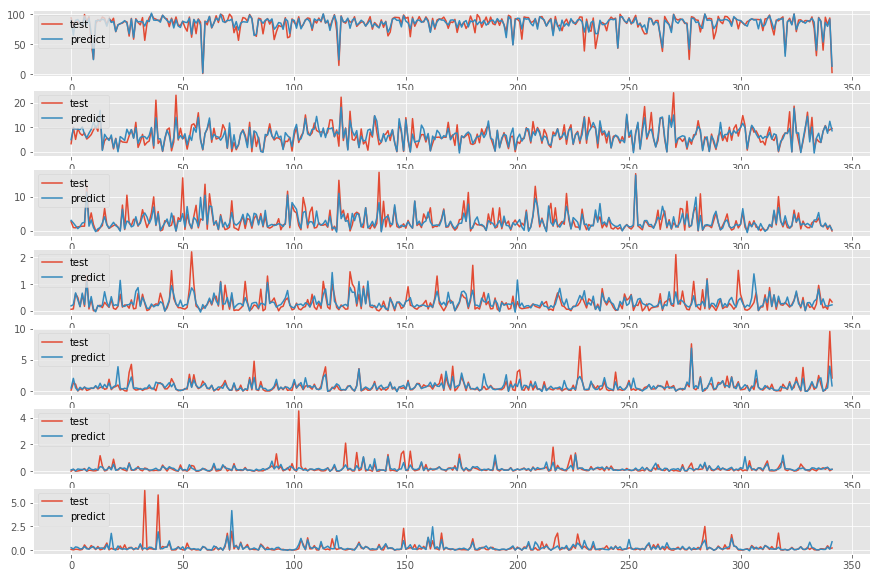

In [1435]:
fig, axs = plt.subplots(ytrain.shape[1],1, figsize=(15, 10), facecolor='w', edgecolor='k')

model = CatBoostRegressor(iterations=1000, 
                          depth=6,loss_function='RMSE', silent = True)

r2_scores = np.zeros((ytrain.shape[1],1))
mse_scores = np.zeros((ytrain.shape[1],1))
mae_scores = np.zeros((ytrain.shape[1],1))

print('Gas type', 'R2 score', 'MSE', 'MAE')
for i in range(ytrain.shape[1]):
    X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain[:,i], test_size=0.2)
    train_pool = Pool(X_train, y_train)
    test_pool = Pool(X_test)
    model.fit(train_pool)
    pred = model.predict(test_pool)
    r2_scores[i] = r2_score(y_test, pred)
    mse_scores[i] = mean_squared_error(y_test, pred)
    mae_scores[i] = mean_absolute_error(y_test, pred)
    axs[i].plot(y_test)
    axs[i].plot(pred)
    axs[i].legend(['test','predict'],loc="upper left")
    print(target_cols[i], r2_scores[i],  mse_scores[i], mae_scores[i])


In [1436]:
model = CatBoostRegressor(iterations=1000, 
                          depth=6, loss_function='RMSE', silent = True)

for i in range(ytrain.shape[1]):
    scores = cross_validate(model, Xtrain, ytrain[:,i], cv=5, scoring=('r2', 'neg_mean_squared_error',
                                                                          'neg_mean_absolute_error' ))
    print(target_cols[i], scores['test_r2'])
    print(target_cols[i], scores['test_neg_mean_squared_error'])
    print(target_cols[i], scores['test_neg_mean_absolute_error'])
    print('\n')

GAS_C1 [ 0.66178783  0.78475222 -0.0395636   0.5093101   0.25428791]
GAS_C1 [ -55.49177833 -101.58933743  -31.2449957   -81.34381521 -167.47335087]
GAS_C1 [-5.49928786 -5.96887175 -4.41256547 -5.83659834 -8.62511046]


GAS_C2 [0.39202775 0.45202059 0.36230324 0.47588916 0.39086069]
GAS_C2 [ -9.5913571   -9.29342587  -5.94037421  -9.31561957 -16.64034316]
GAS_C2 [-2.42595233 -1.98427606 -1.75996711 -2.2305056  -2.98814028]


GAS_C3 [0.26241079 0.21331295 0.04073114 0.25972423 0.21437136]
GAS_C3 [ -4.86792509  -3.50325209  -1.66277931  -6.98878159 -12.26081124]
GAS_C3 [-1.45856312 -0.9946407  -0.89307738 -1.53339196 -2.386487  ]


GAS_IC4 [ 0.33845004  0.25224711 -0.27568607  0.01827058  0.17877345]
GAS_IC4 [-0.09128652 -0.10172084 -0.04556526 -0.28578817 -0.17570701]
GAS_IC4 [-0.19968007 -0.15745327 -0.14272617 -0.25237296 -0.27561788]


GAS_NC4 [ 0.38956983  0.23502129 -0.58258218  0.08433815  0.23443419]
GAS_NC4 [-0.55948622 -0.65677972 -0.23437261 -1.94392432 -1.70678467]
GAS_NC4 [-0

In [1437]:
XTEST  = np.array(CNS_gas_test[gas_train.columns].fillna(0))
for i in range(ytrain.shape[1]):
    train_pool = Pool(Xtrain, ytrain[:,i])
    test_pool = Pool(XTEST)
    model.fit(train_pool)
    pred = model.predict(XTEST)
    YTEST[:,i] = pred
pred_test = pd.DataFrame(YTEST, columns = gas_target.columns)


In [1438]:
CNS_gas_test_final = pd.read_csv('CNS_gas_test.csv')
CNS_gas_test_final[target_cols] = pred_test[target_cols]
CNS_gas_test_final

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,...,DD_G_H2,DN_G_N2,DD_G_GAS,DD_G_NC1,DD_G_NC2,DD_G_NC3,DD_G_IC4,DD_G_NC4,DD_G_IC5,DD_G_NC5
0,United Kingdom,021/30-13A,21/30- 13A,WELL,NaN,021/30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United Kingdom,021/30-13A,21/30- 13A,WELL,NaN,021/30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,021/30-13A,21/30- 13A,WELL,NaN,021/30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,029/08a-03,29/8a- 3,WELL,ACORN,029/08A,56.753463,1.540329,World Geodetic System 1984,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,029/08a-03,29/8a- 3,WELL,ACORN,029/08A,56.753463,1.540329,World Geodetic System 1984,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,United Kingdom,029/08a-03,29/8a- 3,WELL,ACORN,029/08A,56.753463,1.540329,World Geodetic System 1984,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Kingdom,029/07- 12 (CUD P4),29-07-12,WELL,CURLEW D,029/07a Rest of Block,56.721377,1.309164,World Geodetic System 1984,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,United Kingdom,029/07- 12 (CUD P4),29-07-12,WELL,CURLEW D,029/07a Rest of Block,56.721377,1.309164,World Geodetic System 1984,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United Kingdom,029/07- 12 (CUD P4),29-07-12,WELL,CURLEW D,029/07a Rest of Block,56.721377,1.309164,World Geodetic System 1984,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,United Kingdom,029/07- 12 (CUD P4),29-07-12,WELL,CURLEW D,029/07a Rest of Block,56.721377,1.309164,World Geodetic System 1984,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1439]:
CNS_gas_test_final.to_csv('kek.csv')

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2)
fig, axs = plt.subplots(ytrain.shape[1],1, figsize=(15, 10), facecolor='w', edgecolor='k')

model = CatBoostRegressor(iterations=1000, 
                          depth=6, loss_function='RMSE', silent = True)

r2_scores = np.zeros((ytrain.shape[1],1))
mse_scores = np.zeros((ytrain.shape[1],1))
mae_scores = np.zeros((ytrain.shape[1],1))

for i in range(7):
    for train_index, test_index in sss.split(Xtrain, ytrain[:,i]):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        train_pool = Pool(X_train, y_train)
        test_pool = Pool(X_test)
        model.fit(train_pool)
        pred = model.predict(test_pool)
        r2_scores[i] = r2_score(y_test, pred)
        mse_scores[i] = mean_squared_error(y_test, pred)
        mae_scores[i] = mean_absolute_error(y_test, pred)
        axs[i].plot(y_test)
        axs[i].plot(pred)
        axs[i].legend(['test','predict'],loc="upper left")
        print(target_cols[i], r2_scores[i],  mse_scores[i], mae_scores[i])
